In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from collections import defaultdict
from pathlib import Path

In [4]:
base_keys = list({
                'gACH':(0,0),
                'rDA':(0,0),
                'gDA':(0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndex':(0,0),
                'photometrySideInIndexr':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndexAA':(0,0),
                'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0),
                'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0),
                'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0),
                'photometrySideInIndexab':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                }.keys())
# base_keys

used_run_majors = ['base_simple', 'base_words', '_to_']


In [5]:
# load_folder = base_location / Path(r'Figure_6_g1')
# h5_beta_locations = str((load_folder / Path(r'all/glu_run_*/coefs/*_best_coeffs.h5')).resolve())

# out_folder = base_location / Path(r'final_outputs_glu_run')

In [6]:
h5_lst = defaultdict(list)
run_id_dct = defaultdict(list)

# base_location = Path(r'/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs')
base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

fig_folder_lst = [# ('Figure_1_2', 'f1*-ft'),
#                   ('Figure_3',   'f3*-ft'),
#                   ('Figure_4_g1',   'f4*-ft'),
#                   ('Figure_4_g2',   'f4*-ft'),
#                   ('Figure_5_g1',   'f5*-ft'),
#                   ('Figure_5_g2',   'f5*-ft'),
#                   ('Figure_5_g5',   'f5*-ft'),
#                    ('Figure_6_g1', 'glu_run_20221202-no-CO_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft_0-ft')
                   ('Figure_6_g1', 'glu_run_20221202-30sft-reduc_0-ft')
                 ]

for fig_folder in fig_folder_lst:
    print('fig_folder', fig_folder)
    
    load_folder = base_location / Path(fig_folder[0])
    # load_folder = base_location / Path(r'tmp')
    h5_beta_locations = str((load_folder / Path('all') / Path(fig_folder[1]) / Path(r'coefs\*_best_coeffs.h5')).resolve())
    
    
    print(h5_beta_locations)
    


#     base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

#     load_folder = base_location / Path(r'Figure_1_2')
#     h5_beta_locations = str((load_folder / Path(r'all\f1*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_3')
#     # h5_beta_locations = str((load_folder / Path(r'all\f3*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())

#     out_folder = base_location / Path(r'final_outputs')

#     # h5_beta_locations = Path('/Users/josh/Dropbox (HMS)/jz/Tetanus/1194_1195_1214_1258_1259_2_best_coeffs.h5')
#     out_loc = str((out_folder).resolve())
#     h5_beta_locations = glob.glob(h5_beta_locations)


    subloc_out = Path(f'final_out_{fig_folder[1]}')
    out_folder = base_location / subloc_out

    out_loc = str((out_folder).resolve())
    h5_beta_locations = glob.glob(h5_beta_locations)

    fh.create_folder_if_not_exists(out_loc)
    
    h5_lst = defaultdict(list)
    for h5_coef_fn in h5_beta_locations:
        h5f = pd.HDFStore(h5_coef_fn)
        h5fk = h5f.keys()
        for key in h5fk:
            print(key)
            resp = key.split('_')[0].replace('/', '')
            model_version = '_'.join(key.split('_')[2:]).split('_run_num')[0]
            model_version = model_version.replace('5_base_words_gDA_to_gACH', '5_base_words_rDA_to_gACH')
    #         print(resp, model_version)
            h5_df = pd.read_hdf(h5f, key).reset_index()
            h5_df['fn'] = h5_coef_fn
            h5_df['key'] = key
            h5_df = h5_df.set_index(['fn','key'])


            h5_df = h5_df.sort_values('channel_name')
            h5_df['channel'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[0])
            h5_df['run_num'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[-1])

            h5_lst[(resp, model_version)].append(h5_df)
    #         h5_lst.append(h5_df)
    # concat = pd.concat(h5_lst, axis=0)

    fh.create_folder_if_not_exists(out_loc)



    a = None
    b = None

    h5_dfs = dict(h5_lst)
    for key in h5_dfs:
        run_major = '='.join(key)

        cont = True
        for runmajor in used_run_majors:
            if runmajor in run_major:
                cont = False
        if cont:
            continue

        val = h5_dfs[key]
        concat = pd.concat(val)

        all_kernels = []
        for base_key in base_keys:
            all_kernels += dfh.get_kernel_from_basename(base_key, list(concat.columns))


        gb_columns = ['mouse_id', 'channel', 'name']
        ak_unagg = concat.reset_index().set_index(['mouse_id', 'channel', 'name', 'run_num'])[all_kernels]

        ak_unagg.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels_raw-{run_major}.csv').resolve()))

        kernels = ak_unagg.groupby(gb_columns).agg([np.mean, np.size, np.std])
        kernels = kernels.swaplevel(axis=1)

        ak = concat[all_kernels].copy()
        new_cols = [(dfh.shorten_col_name(_.split('_')[0]), int(_.split('_')[1])) for _ in ak.columns]



        ak.columns = pd.MultiIndex.from_tuples(new_cols)
        ak['1'] = 1
        akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()
        akgb.loc['sem'] = akgb.loc['std']/np.sqrt(akgb.loc['size'])
    #     akgb = akgb.loc[['mean', 'sem']]
        final_out = akgb.stack(1).unstack(0).copy()
        final_out.columns = ['_'.join(_) for _ in final_out.columns]

    #     if a is None:
    #         a = final_out
    #     else:
    #         b = final_out
    #         break

    #     print(final_out.shape)
        final_out.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels-{run_major}.csv').resolve()))
        
#         display(final_out)

    #     break

fig_folder ('Figure_6_g1', 'glu_run_20221202-30sft-reduc_0-ft')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\Figure_6_g1\all\glu_run_20221202-30sft-reduc_0-ft\coefs\*_best_coeffs.h5
Created directory: C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_out_glu_run_20221202-30sft-reduc_0-ft
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__0
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__1
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__2
/gGLUr_0_1_base_words_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__0
/gGLUr_0_1_base_words_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__1
/gGLUr_0_1_base_words_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__2


C:\Users\Josh\AppData\Local\Temp\ipykernel_3704\4041068732.py:126: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()


In [7]:
h5_beta_locations

['C:\\Users\\Josh\\Documents\\GitHub\\sabatinilab-glm\\sglm\\outputs\\Figure_6_g1\\all\\glu_run_20221202-30sft-reduc_0-ft\\coefs\\1299_1300_1301_1302_0_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_best_coeffs.h5']

In [8]:
final_out

,CI_mean,CI_sem,CI_size,CI_std,SIAA_mean,SIAA_sem,SIAA_size,SIAA_std,SIAB_mean,SIAB_sem,...,SIaa_size,SIaa_std,SIab_mean,SIab_sem,SIab_size,SIab_std,sl_mean,sl_sem,sl_size,sl_std
-30,0.014828,0.011355,3.0,0.019667,-0.252458,0.007577,3.0,0.013123,0.282237,0.118950,...,3.0,0.034099,0.112959,0.024206,3.0,0.041926,0.016606,0.001249,3.0,0.002164
-29,-0.060630,0.010749,3.0,0.018618,-0.263675,0.006302,3.0,0.010916,0.133068,0.091674,...,3.0,0.061551,0.060816,0.035634,3.0,0.061720,0.012498,0.004158,3.0,0.007201
-28,-0.110234,0.013469,3.0,0.023329,-0.268637,0.012468,3.0,0.021596,0.515699,0.034062,...,3.0,0.069213,0.050948,0.053919,3.0,0.093391,0.003201,0.005122,3.0,0.008872
-27,-0.159572,0.007899,3.0,0.013682,-0.254113,0.007533,3.0,0.013048,0.082479,0.108921,...,3.0,0.067070,-0.032133,0.014422,3.0,0.024979,0.011352,0.005605,3.0,0.009708
-26,-0.166375,0.004492,3.0,0.007780,-0.240731,0.020414,3.0,0.035358,-0.088728,0.051405,...,3.0,0.055844,0.078494,0.034395,3.0,0.059574,0.012444,0.003341,3.0,0.005786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,-0.143755,0.007394,3.0,0.012807,-0.024568,0.019713,3.0,0.034144,0.656162,0.024553,...,3.0,0.016826,-0.210896,0.055814,3.0,0.096673,-0.103128,0.001794,3.0,0.003107
27,-0.132883,0.007235,3.0,0.012531,0.096870,0.018771,3.0,0.032512,0.664272,0.114943,...,3.0,0.037884,-0.119543,0.081126,3.0,0.140514,-0.115575,0.002875,3.0,0.004979
28,-0.108443,0.011635,3.0,0.020153,0.160251,0.014636,3.0,0.025350,0.642727,0.143919,...,3.0,0.037129,-0.042412,0.024754,3.0,0.042876,-0.189014,0.000944,3.0,0.001635
29,-0.105761,0.010865,3.0,0.018819,0.177787,0.006945,3.0,0.012030,0.774243,0.081603,...,3.0,0.111349,-0.106902,0.048755,3.0,0.084447,-0.234912,0.002478,3.0,0.004293


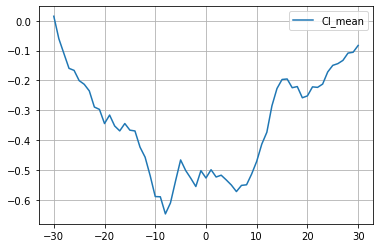

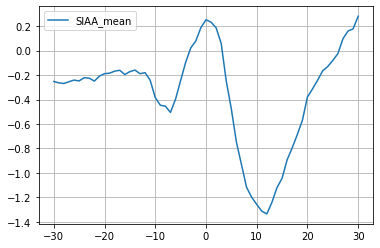

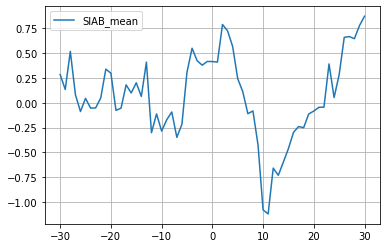

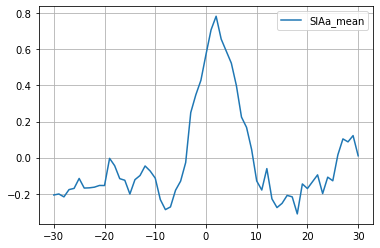

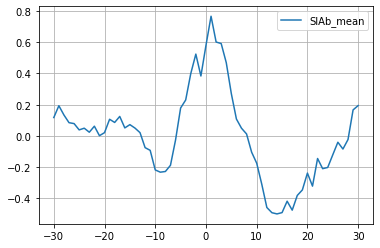

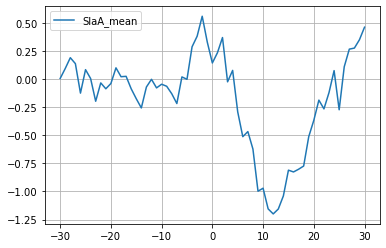

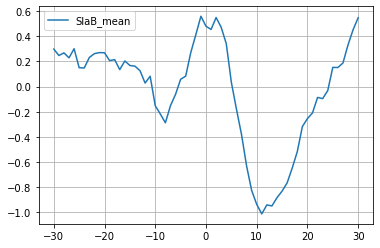

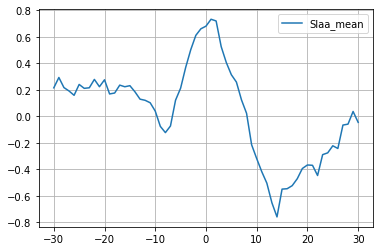

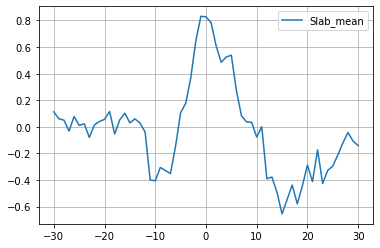

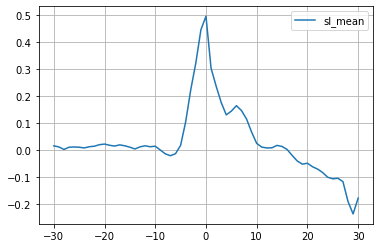

In [9]:
import matplotlib.pyplot as plt
for foc in final_out.columns:
    if 'mean' in foc:
        plt.figure()
        final_out[foc].plot(label=foc)
        plt.legend()
        plt.grid()